# Penalized transition probabilities
Let us start by defining useful bits...

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

a = 12
b = 24
c = 18
X = np.arange(0, 1.05, 0.05)
Y = np.arange(0, 1.05, 0.05)
X, Y = np.meshgrid(X, Y)


def plot_3d(X, Y, Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
    Zmin = np.min(Z)
    Xmin = X[Z == Zmin]
    Ymin = Y[Z == Zmin]
    print("[This is an approximation on the grid] Xmin=%.2f, Ymin=%.2f" % (Xmin, Ymin))
    pt = ax.scatter(Xmin, Ymin, Zmin, c="r", s=50)
    pt_proj = ax.plot(Xmin, Ymin, "rx", zdir="z")

## First, no penalty
In that case, the optimal is p=1 for the probability corresponding to lowest cost and p=0 for others

[This is an approximation on the grid] Xmin=1.00, Ymin=0.00


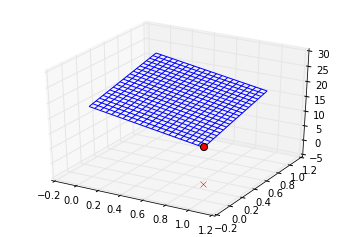

In [2]:
Z = a * X + b * Y + c * (1 - X - Y)
plot_3d(X, Y, Z)

## Then, small penalty
It is likely in this case that the optimal (marked by a red dot) lies on a boundary (i.e. there exists a p that is equal to 0 among three probabilities)

[This is an approximation on the grid] Xmin=0.80, Ymin=0.00


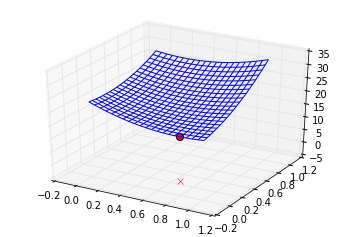

In [3]:
gamma = 5.
Z = a * X + b * Y + c * (1 - X - Y) + gamma * (X ** 2 + Y ** 2 + (1 - X - Y) ** 2)
plot_3d(X, Y, Z)

## When penalty gets bigger...
The optimal converges towards p=1/3 for all variables (i.e. paths)

[This is an approximation on the grid] Xmin=0.35, Ymin=0.30


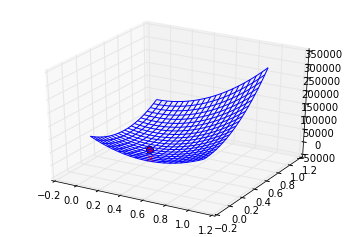

In [4]:
gamma = 100000.
Z = a * X + b * Y + c * (1 - X - Y) + gamma * (X ** 2 + Y ** 2 + (1 - X - Y) ** 2)
plot_3d(X, Y, Z)